# THE NETFLIX DATASET

#### This dataset consists of tv shows and movies available on Netflix as of 2020. The dataset is collected from Flixable which is a third-party Netflix search engine.

#### In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

#### Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## ABOUT THE COLUMNS

#### 1) TYPE - It tells us what kind of content it is (Movie or TV Show)
#### 2) TITLE - This contains name of the Movie or TV Show
#### 3) CAST - Contains names of the featured persons (actors and actresses)
#### 4) COUNTRY - Where a particular has been produced.
#### 5) DATE ADDED - A date on which a content was released/launched.
#### 6) RELEASE YEAR - The year in which movie/tv show was released
#### 7) RATING - It tells about which kind of audience the content was created for
#### 8) DURATION - The runtime of the Movie or TV Show
#### 9) LISTED IN - It describes the genre of a content
#### 10) DESCRIPTION - It tells us the insider story of the content

# =============================================================

## Importing the required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import plotly.express as px # for interactive data visualization
import squarify
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

## Reading the sample dataset file

In [2]:
df = pd.read_csv("C:/Users/aroha/netflixmov.csv")
df
#temp = pd.DataFrame(df)
#temp

show_id     type                                    title  \
0         s1  TV Show                           Chhup chhup ke   
1         s2    Movie                              Chori Chori   
2         s3    Movie                          Dil Maange More   
3         s4    Movie                           Dil Hai Khilan   
4         s5    Movie                                The Train   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                                NaN   

                                                country date_added  \
0                                                Brazil  14-Aug-20   
1                                                Mexico  23-Dec-16   
2                                             Singapore  20-Dec-18   
3                                         United States  16-Nov-17   
4                                         United States   1-Jan-20   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...  19-Oct-20   
7783                                              India   2-Mar-19   
7784                                                NaN  25-Sep-20   
7785                                          Australia  31-Oct-20   
7786              United Kingdom, Canada, United States   1-Mar-20   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
0     In a future where the elite inhabit an island ...  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a p

## To know the number of rows and columns

In [3]:
shape=df.shape
print(shape)

(7787, 12)


## To pull up first 5 rows

In [4]:
df.head()

show_id     type            title           director  \
0      s1  TV Show   Chhup chhup ke                NaN   
1      s2    Movie      Chori Chori  Jorge Michel Grau   
2      s3    Movie  Dil Maange More       Gilbert Chan   
3      s4    Movie   Dil Hai Khilan        Shane Acker   
4      s5    Movie        The Train     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0  14-Aug-20          2020  TV-MA  4 Seasons   
1  23-Dec-16          2016  TV-MA     93 min   
2  20-Dec-18          2011      R     78 min   
3  16-Nov-17          2009  PG-13     80 min   
4   1-Jan-20          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

## To pull up last 5 rows

In [5]:
df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...  19-Oct-20   
7783                                              India   2-Mar-19   
7784                                                NaN  25-Sep-20   
7785                                          Australia  31-Oct-20   
7786              United Kingdom, Canada, United States   1-Mar-20   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Dropping Director and Show ID Columns

#### I choose to drop the 'director' and 'show_id'columns completely as they have high volume of missing values and dropping these columns will not effect my visualization.

In [6]:
df.drop(['director','show_id'],axis = 1,inplace = True)
df.head()

type            title  \
0  TV Show   Chhup chhup ke   
1    Movie      Chori Chori   
2    Movie  Dil Maange More   
3    Movie   Dil Hai Khilan   
4    Movie        The Train   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0  14-Aug-20          2020  TV-MA  4 Seasons   
1  23-Dec-16          2016  TV-MA     93 min   
2  20-Dec-18          2011      R     78 min   
3  16-Nov-17          2009  PG-13     80 min   
4   1-Jan-20          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## Filling up the missing values in columns

#### Filling all the missing values in the 'country' column with United States as Netflix was created in the USA and every show is aired on Netflix US.

In [7]:
df['country'].replace(np.nan, 'United States',inplace  = True)
df.isnull()

type  title   cast  country  date_added  release_year  rating  \
0     False  False  False    False       False         False   False   
1     False  False  False    False       False         False   False   
2     False  False  False    False       False         False   False   
3     False  False  False    False       False         False   False   
4     False  False  False    False       False         False   False   
...     ...    ...    ...      ...         ...           ...     ...   
7782  False  False  False    False       False         False   False   
7783  False  False  False    False       False         False   False   
7784  False  False  False    False       False         False   False   
7785  False  False  False    False       False         False   False   
7786  False  False   True    False       False         False   False   

      duration  listed_in  description  
0        False      False        False  
1        False      False        False  
2        False      False        False  
3        False      False        False  
4        False      False        False  
...        ...        ...          ...  
7782     False      False        False  
7783     False      False        False  
7784     False      False        False  
7785     False      False        False  
7786     False      False        False  

[7787 rows x 10 columns]

## To get the statistical description

In [8]:
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

## Checking the data type of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7787 non-null   object
 1   title         7787 non-null   object
 2   cast          7069 non-null   object
 3   country       7787 non-null   object
 4   date_added    7777 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7780 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
 9   description   7787 non-null   object
dtypes: int64(1), object(9)
memory usage: 608.5+ KB


## Getting all the data where Type = Movie

In [10]:
movie_df = df[df['type']=='Movie']
movie_df

type                                    title  \
1     Movie                              Chori Chori   
2     Movie                          Dil Maange More   
3     Movie                           Dil Hai Khilan   
4     Movie                                The Train   
6     Movie                                     Jism   
...     ...                                      ...   
7781  Movie                                     Zoom   
7782  Movie                                     Zozo   
7783  Movie                                   Zubaan   
7784  Movie                        Zulu Man in Japan   
7786  Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   cast  \
1     Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2     Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3     Elijah Wood, John C. Reilly, Jennifer Connelly...   
4     Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
6     Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...   
...                                                 ...   
7781  Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...   
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7786                                                NaN   

                                                country date_added  \
1                                                Mexico  23-Dec-16   
2                                             Singapore  20-Dec-18   
3                                         United States  16-Nov-17   
4                                         United States   1-Jan-20   
6                                                 Egypt   1-Jun-20   
...                                                 ...        ...   
7781                                      United States  11-Jan-20   
7782  Sweden, Czech Republic, United Kingdom, Denmar...  19-Oct-20   
7783                                              India   2-Mar-19   
7784                                      United States  25-Sep-20   
7786              United Kingdom, Canada, United States   1-Mar-20   

      release_year rating duration  \
1             2016  TV-MA   93 min   
2             2011      R   78 min   
3             2009  PG-13   80 min   
4             2008  PG-13  123 min   
6             2019  TV-MA   95 min   
...            ...    ...      ...   
7781          2006     PG   88 min   
7782          2005  TV-MA   99 min   
7783          2015  TV-14  111 min   
7784          2019  TV-MA   44 min   
7786          2019  TV-MA   90 min   

                                              listed_in  \
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
6                   Horror Movies, International Movies   
...                                                 ...   
7781                 Children & Family Movies, Comedies   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7786                    Documentaries, Music & Musicals   

                                            description  
1     After a devastating earthquake hits Mexico Cit...  
2     When an army recruit is found dead, his fellow...  
3     In a postapocalyptic world, rag-doll robots hi...  
4     A brilliant group of students become card-coun...  
6     After an awful accident, a couple admitted to ...  
...                                                 ...  
7781  Dragged from civilian life, a former superhero...  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South Afric

## Getting all the data where Type = TV Shows

In [11]:
tvshow_df = df[df['type']=='TV Show']
tvshow_df

type                  title  \
0     TV Show         Chhup chhup ke   
5     TV Show                  Aksar   
11    TV Show        Andaz Apna Apna   
12    TV Show     Raja Harishchandra   
16    TV Show                    Don   
...       ...                    ...   
7767  TV Show     Zindagi Gulzar Hai   
7775  TV Show             Zoids Wild   
7777  TV Show            Zombie Dumb   
7779  TV Show              Zona Rosa   
7785  TV Show  Zumbo's Just Desserts   

                                                   cast  \
0     João Miguel, Bianca Comparato, Michel Gomes, R...   
5     Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...   
11    Robert Więckiewicz, Maciej Musiał, Michalina O...   
12                                                  NaN   
16    Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...   
...                                                 ...   
7767  Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...   
7775  Kensho Ono, Takahiro Sakurai, Mikako Komatsu, ...   
7777                                                NaN   
7779  Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...   
7785                         Adriano Zumbo, Rachel Khoo   

                    country date_added  release_year rating   duration  \
0                    Brazil  14-Aug-20          2020  TV-MA  4 Seasons   
5                    Turkey   1-Jul-17          2016  TV-MA   1 Season   
11    Poland, United States  30-Nov-18          2018  TV-MA   1 Season   
12                   Mexico  17-May-19          2019  TV-MA   1 Season   
16            United States  20-Mar-19          2018  TV-14   1 Season   
...                     ...        ...           ...    ...        ...   
7767               Pakistan  15-Dec-16          2012  TV-PG   1 Season   
7775                  Japan  14-Aug-20          2018  TV-Y7   1 Season   
7777          United States   1-Jul-19          2018  TV-Y7  2 Seasons   
7779                 Mexico  26-Nov-19          2019  TV-MA   1 Season   
7785              Australia  31-Oct-20          2019  TV-PG   1 Season   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
5       International TV Shows, TV Dramas, TV Mysteries   
11    Crime TV Shows, International TV Shows, TV Dramas   
12    Crime TV Shows, Docuseries, International TV S...   
16                    International TV Shows, TV Dramas   
...                                                 ...   
7767  International TV Shows, Romantic TV Shows, TV ...   
7775                             Anime Series, Kids' TV   
7777             Kids' TV, Korean TV Shows, TV Comedies   
7779  International TV Shows, Spanish-Language TV Sh...   
7785                 International TV Shows, Reality TV   

                                            description  
0     In a future where the elite inhabit an island ...  
5     A genetics professor experiments with a treatm...  
11    In this dark alt-history thriller, a naïve law...  
12    Archival video and new interviews examine Mexi...  
16    As a psychology professor faces Alzheimer's, h...  
...                                                 ...  
7767  Strong-willed, middle-class Kashaf and carefre...  
7775  A quest for freedom and legendary treasure beg...  
7777  While living alone in a spooky town, a young g...  
7779  An assortment of talent takes the stage for a ...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  

[2410 rows x 10 columns]

# ====================== VISUALIZATIONS ========================

## V1) Types of Content available on Netflix

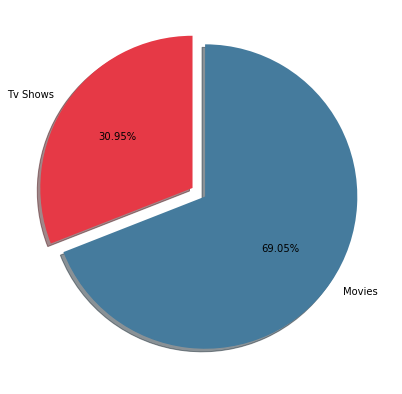

In [12]:
plt.figure(figsize=(12,7))
plt.pie(df['type'].value_counts().sort_values(),labels=['Tv Shows','Movies'],explode=[0.1,0],
        autopct='%1.2f%%',colors=['#e63946','#457b9d'],shadow=True, startangle=90)
plt.show()

### Conclusion: Nearly 1/3rd of the content on netflix are movies and remaining 2/3rd of them are TV Show

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V2) Trend of the contents added over the years.

In [13]:
df1=df[['type','release_year']]
df1

df2=df.groupby(['release_year','type']).size().reset_index(name='total_content')
df2=df2[df2['release_year']>=1940]
df2

fig3 = px.line(df2, x="release_year", y="total_content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

## Conclusions: 
### 1) The growth in number of movies on netflix is much higher than that of TV shows
### 2) About 1200 new movies were added in both 2018 and 2019
### 3) The growth in content started from 2013

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V3) Number of Netflix contents which are either Movie or TV Show

Text(0.5, 1.0, 'Movies Vs TV Shows')

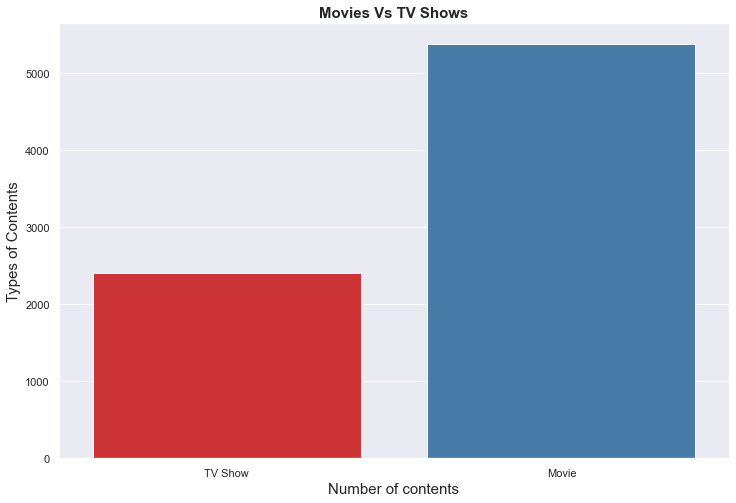

In [14]:
sns.set(style='darkgrid')
plt.figure(figsize=(12,8))
sns.countplot(x ='type',data=df,palette='Set1')
plt.xlabel("Number of contents",fontsize=15)
plt.ylabel("Types of Contents",fontsize=15)
plt.title("Movies Vs TV Shows",fontsize=15,fontweight='bold')


### Conclusion: Graphs represents that there are around 5200 films which falls under the 'Movie' category and 2200 films falls under the 'TV Series'

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V4) Number of contents corresponding to types of audiences

Text(0.5, 1.0, 'Contents and its Ratings')

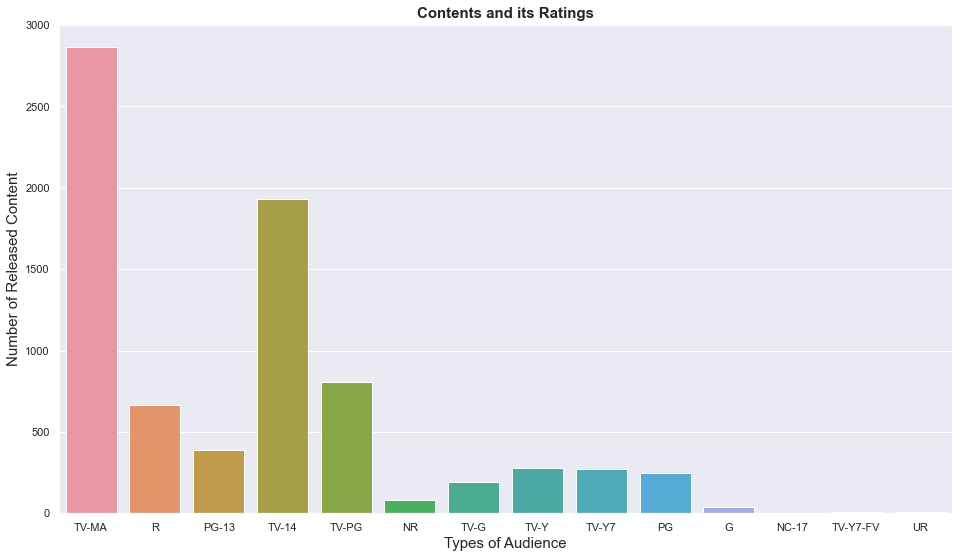

In [15]:
plt.figure(figsize=(16,9))
sns.countplot(x='rating',data=df);
plt.xlabel("Types of Audience",fontsize=15)
plt.ylabel("Number of Released Content",fontsize=15)
plt.title("Contents and its Ratings",fontsize=15,fontweight='bold')

### Conclusion : Out of total number of contents released on Netflix are more for 'Mature Audiences'. 

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V5) Type of content bifurcated into TV Show and Movie across different audience types.

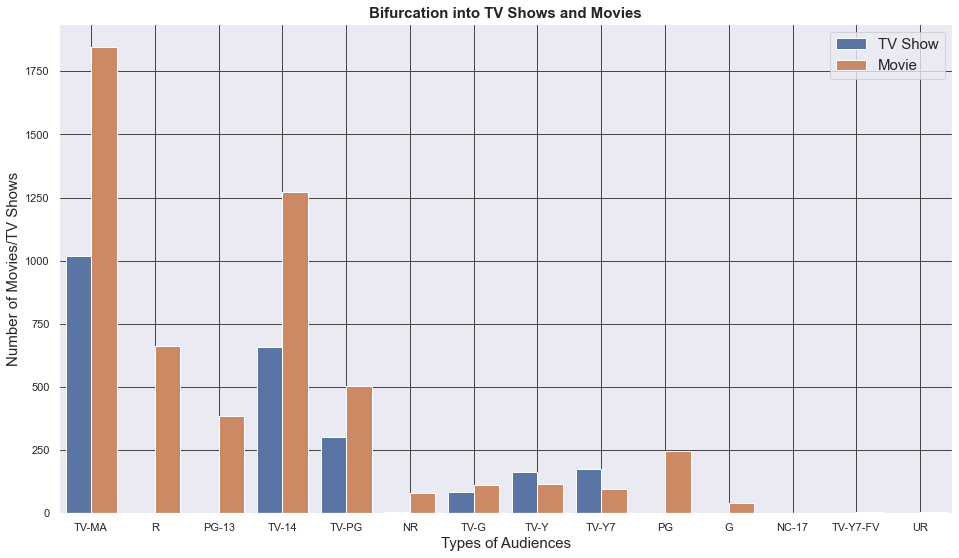

In [16]:
plt.figure(figsize=(16,9))
sns.countplot('rating',data=df,hue='type');
plt.title("Bifurcation into TV Shows and Movies",fontweight='bold',fontsize=15)
plt.legend(loc='upper right',prop={"size":15})
plt.xlabel("Types of Audiences",fontsize=15)
plt.ylabel("Number of Movies/TV Shows",fontsize=15)
plt.grid(True,color='#464646')


### Conclusion: It is quite evident that 70% of all the Netflix content are rated as 'TV-MA' i.e 'Mature Audience'

#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V6) Which country has most releases

In [17]:
!pip install Wordcloud

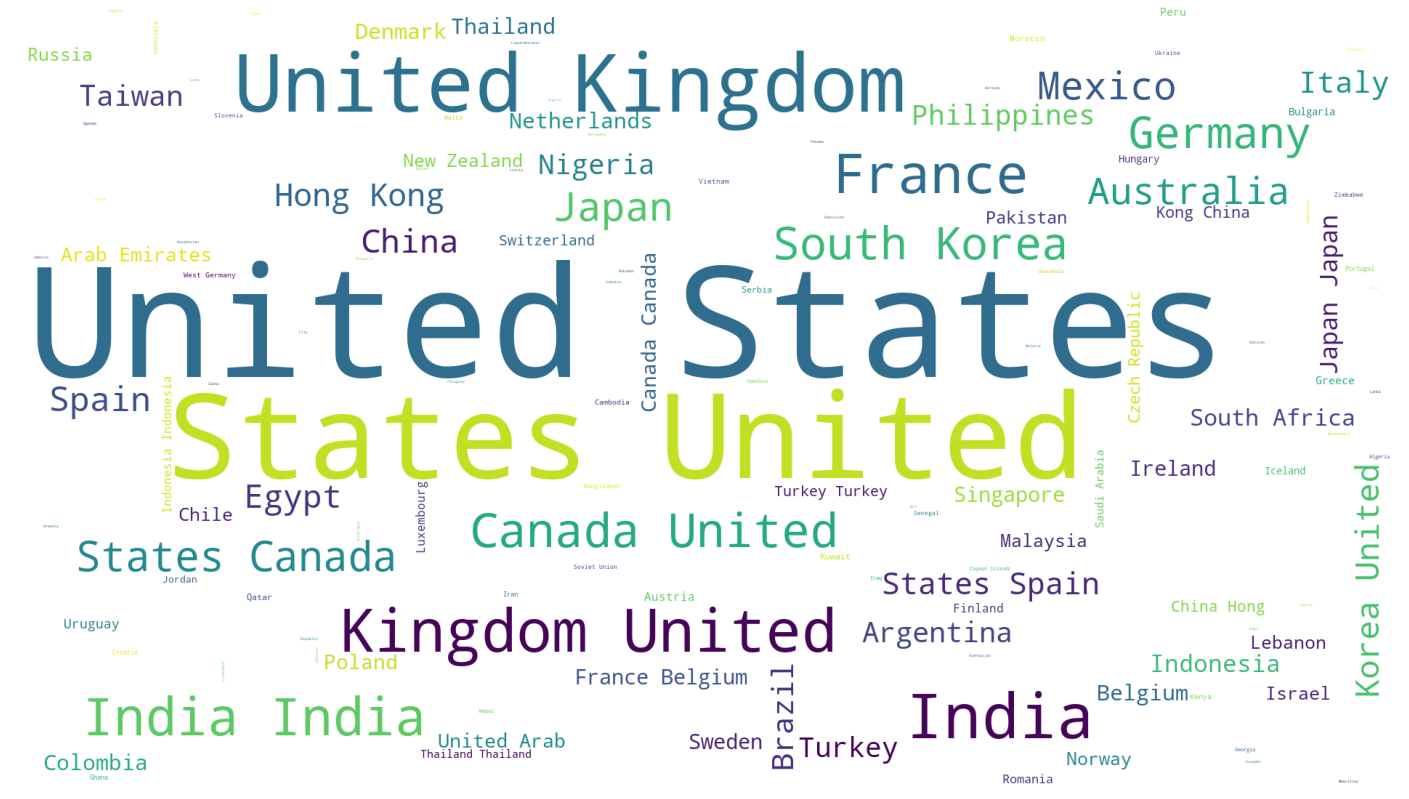

In [18]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='white',width=1920,height=1080).generate(" ".join(df.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show();

### The above graph states that United States is the which produces highest number of Movies and TV Shows

#### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V7) To find the top genre of Movies/TV Shows

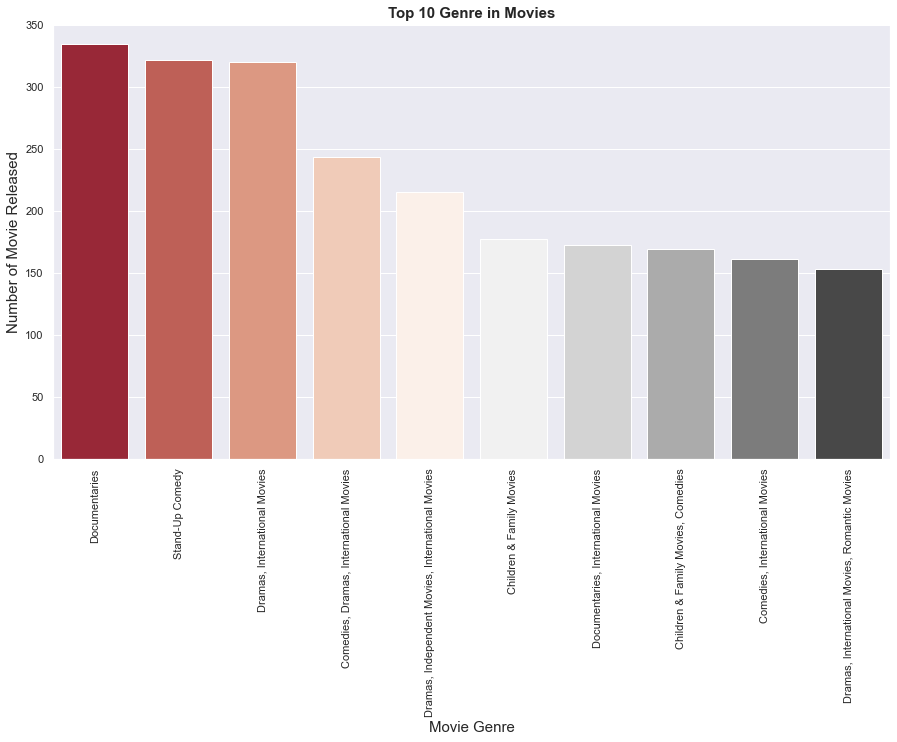

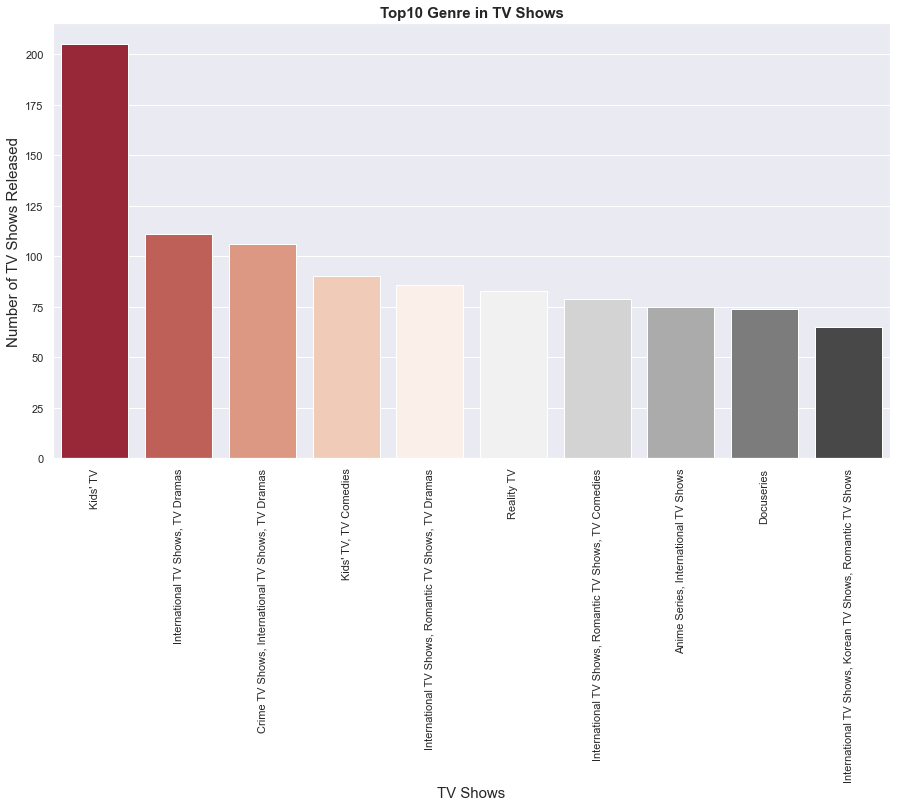

In [21]:
# for top 10 Genre in Movies

plt.figure(figsize=(15,8))
sns.barplot(x = movie_df["listed_in"].value_counts().head(10).index,
            y = movie_df["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xlabel("Movie Genre",fontsize=15)
plt.ylabel("Number of Movie Released",fontsize=15)
plt.xticks(rotation=90)
plt.title("Top 10 Genre in Movies",fontsize=15, fontweight="bold")
plt.show()

print("\n")


# for top 10 Genre in TV Shows
plt.figure(figsize=(15,8))
sns.barplot(x = tvshow_df["listed_in"].value_counts().head(10).index,
            y = tvshow_df["listed_in"].value_counts().head(10).values,palette="RdGy")
plt.xlabel("TV Shows",fontsize=15)
plt.ylabel("Number of TV Shows Released",fontsize=15)
plt.xticks(rotation=90)
plt.title("Top10 Genre in TV Shows",fontsize=15, fontweight="bold")
plt.show()

## V8) Counting the number of seasons by which most of the TV Shows ends

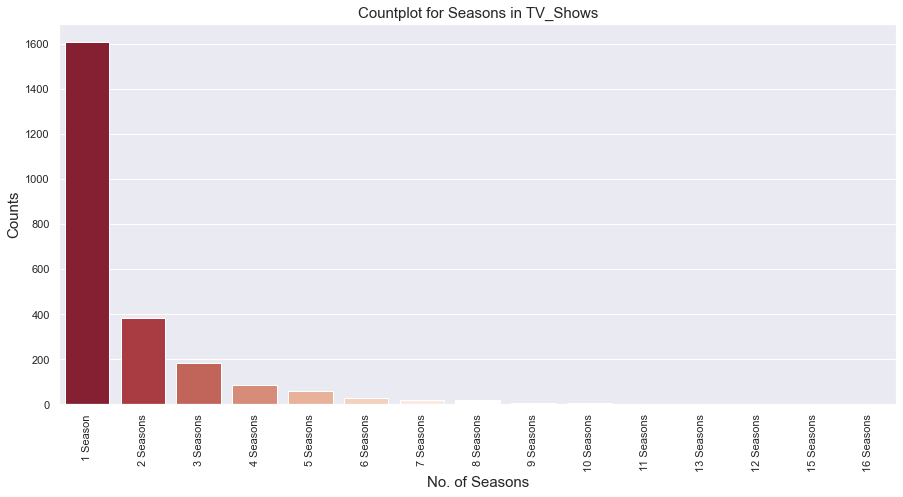

In [23]:
plt.figure(figsize=(15,7))
ax = sns.countplot(tvshow_df['duration'],order = tvshow_df['duration'].value_counts().index,palette="RdGy")
plt.title('Countplot for Seasons in TV_Shows',fontsize=15)
plt.xlabel("No. of Seasons",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.xticks(rotation=90)

#for p in ax.patches:ax.annotate(str(p.get_height()), (p.get_x() * 1.005, (p.get_height() * 1.005)))

plt.show()

#### Conclusion: From the above graph shows that around 90% of the TV_Shows end by Season 3.

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V9) Top 20 Genre present on Netflix

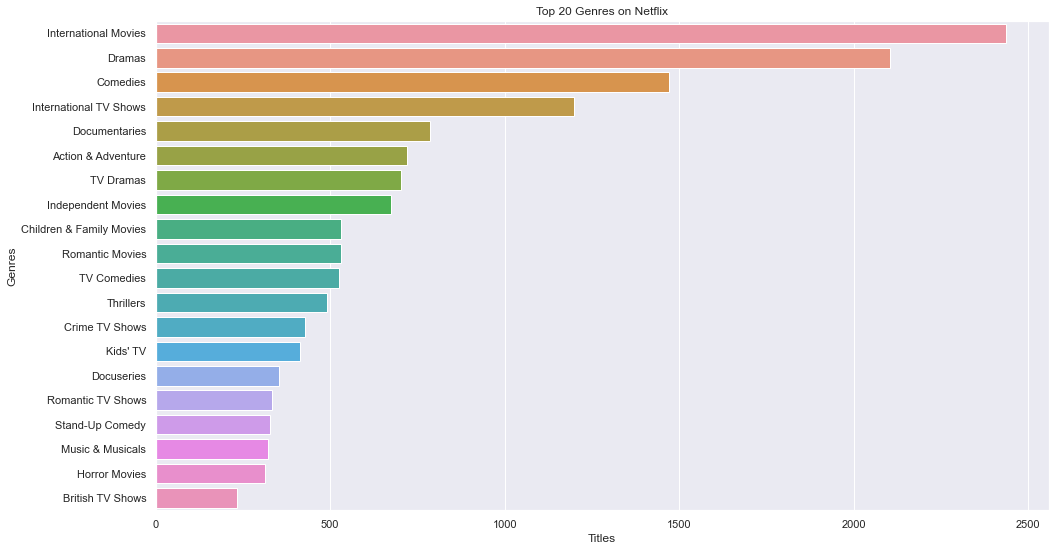

In [24]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(16,9))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

### Conclusion: From the graph, we can conclude that International Movies take the first place, followed by dramas and comedies.

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### This time, we are no longer working with aggregates but instead with individual movies. A plot is no longer a good choice for our data, so we will try with scatter plot instead.

## V10) How the duration of Movies has changed overtime

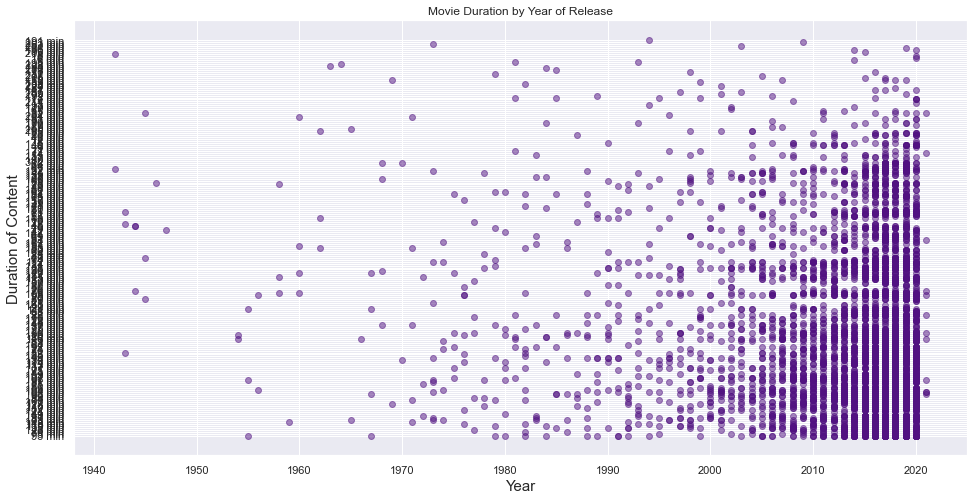

In [25]:
# Subset the DataFrame for type "Movie"
df_movies = df[df['type'] == 'Movie']
df_movies

# Select only the columns of interest
df_movies_cols = df_movies[['release_year','duration']]

# Print the first five rows of the new DataFrame
df_movies_cols


# Create the years and durations lists
years = df_movies_cols['release_year']
durations = df_movies_cols['duration']

# Create a figure and increase the figure size
fig = plt.figure(figsize=(16,8))

# Create a scatter plot of duration versus year
plt.scatter(years, durations,c="#511281",alpha=0.5)

plt.ylabel("Duration of Content", fontsize=15)
plt.xlabel("Year", fontsize=15)

# Create a title
plt.title('Movie Duration by Year of Release')

# Show the plot
plt.show()


### Conclusion:  It is quite clear that most of the Movies has runtime of about 120 mins.

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V11) Which country creates most number of Shows/Movies?

Text(0, 0.5, 'Countries')

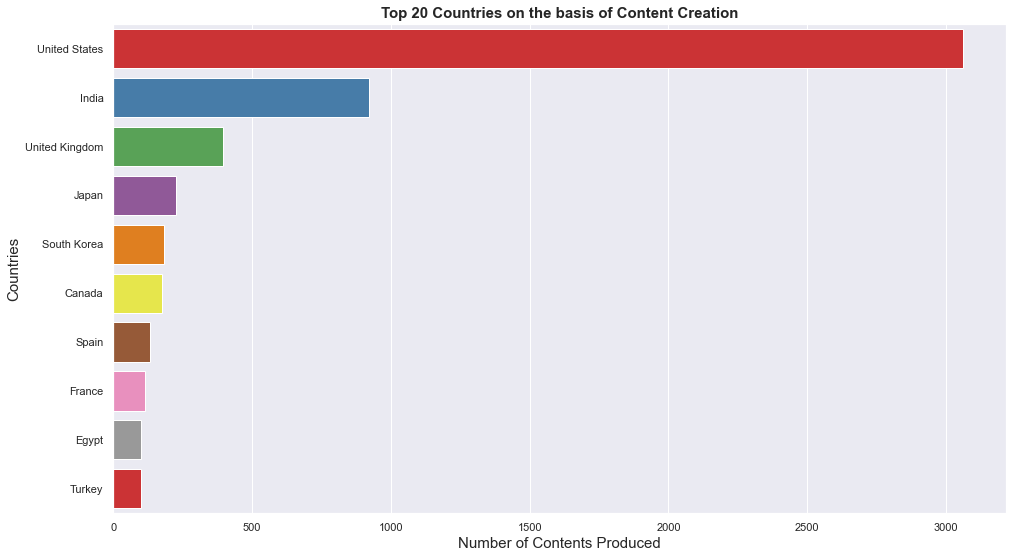

In [26]:
plt.figure(figsize=(16,9))
sns.countplot(data=df,y='country',order=df['country'].value_counts().index[0:10],palette='Set1')
plt.title('Top 20 Countries on the basis of Content Creation', fontsize=15, fontweight='bold')
plt.xlabel("Number of Contents Produced", fontsize=15)
plt.ylabel("Countries", fontsize=15)

#### Conclusion:US Produces most number of shows

### +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V12) In which year highest number of Shows were added?

Text(0, 0.5, 'Years')

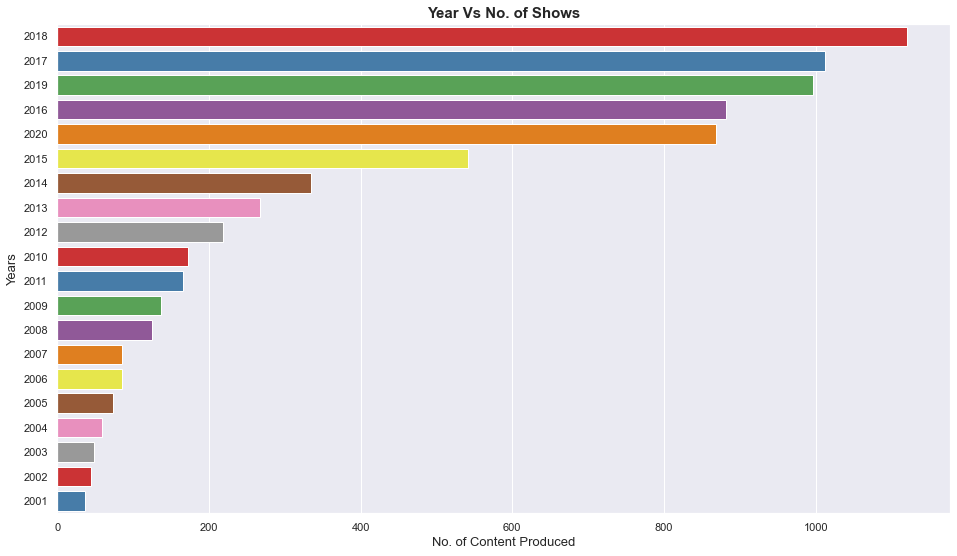

In [27]:
sns.set(style='darkgrid')
plt.figure(figsize=(16,9))
ax = sns.countplot(y='release_year',data=df,order=df['release_year'].value_counts().index[0:20],palette='Set1')
plt.title("Year Vs No. of Shows",fontsize=15, fontweight='bold')
plt.xlabel("No. of Content Produced", fontsize=13)
plt.ylabel("Years", fontsize=13)



#### Conclusion: Year 2018 has the highest number of content released.

### ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V13) How the releasing of content changed over the years for different age groups

Text(21.363920634920646, 0.5, 'Types of Audience')

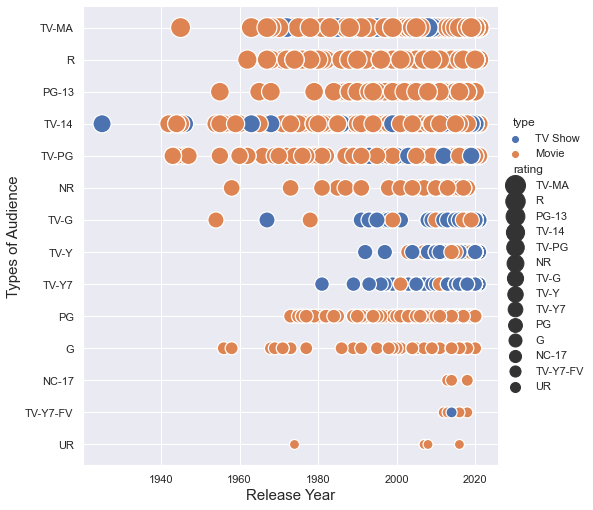

In [28]:
df_rel = pd.read_csv("C:/Users/aroha/netflixmov.csv")
df_rel

sns.relplot(x="release_year", y="rating", hue="type",size="rating",sizes=(100,400), alpha=1, height=7,data=df_rel)
plt.title("")
plt.xlabel("Release Year", fontsize=15)
plt.ylabel("Types of Audience",fontsize=15)

#### Conclusion: It is quite clear that the number of contents released for higher age groups is maximum with time.

# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

## V14) Top 10 producing Movies and TV Shows on Netflix

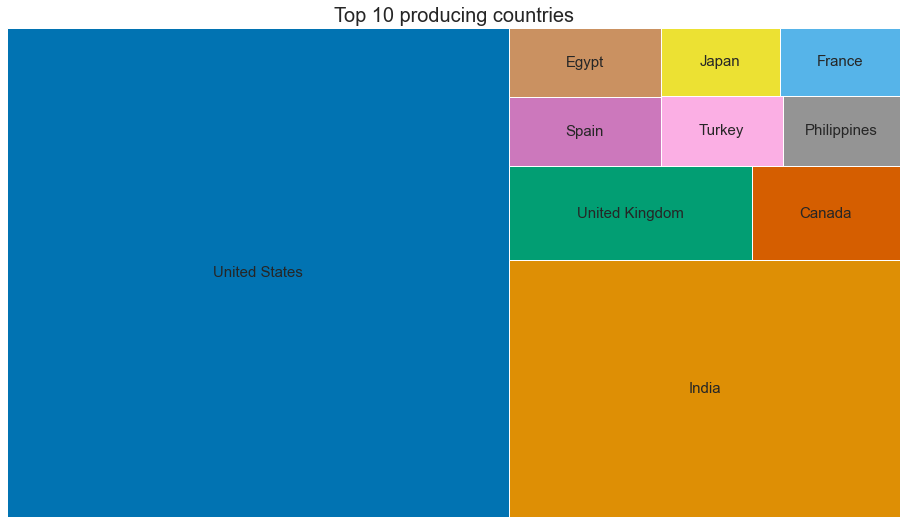

In [30]:
y = df_movies["country"].value_counts().head(10)
fig = plt.figure(figsize=(16, 9))
squarify.plot(sizes = y.values, label = y.index, color=sns.color_palette("colorblind", n_colors=10),
             linewidth=1, text_kwargs={'fontsize':15},norm_x=100)
plt.title('Top 10 producing countries', fontsize = 20)
print("\n")
plt.axis('off')
plt.show()

## ============================ THANK YOU! ===============================